# Import packages for implementation

Configuration packages

In [197]:
import warnings
warnings.filterwarnings('ignore')

Classical packages

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Machine Learning packages

In [201]:
! pip install prophet
from prophet import Prophet

# Reading the dataset

In [203]:
# Reading the dataset
covid_data= pd.read_csv('covid.csv', parse_dates=['Date'])

In [204]:
covid_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# Exploratory Data Analysis

In [206]:
# Information of the data
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [207]:
# Renaming each column of the data to ease the work
covid_data.rename(columns= {'Province/State': 'state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'Date': 'date', 
                            'Confirmed': 'confirmed', 'Deaths': 'deaths', 'Recovered': 'recovered', 'Active': 'active'}, inplace=True)

In [208]:
#accessing the data based on a specified date
covid_data[covid_data['date'] == '2020-07-23']

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
47763,NaN,Afghanistan,33.939110,67.709953,2020-07-23,35928,1211,24550,10167,Eastern Mediterranean
47764,NaN,Albania,41.153300,20.168300,2020-07-23,4466,123,2523,1820,Europe
47765,NaN,Algeria,28.033900,1.659600,2020-07-23,25484,1124,17369,6991,Africa
47766,NaN,Andorra,42.506300,1.521800,2020-07-23,889,52,803,34,Europe
47767,NaN,Angola,-11.202700,17.873900,2020-07-23,851,33,236,582,Africa
...,...,...,...,...,...,...,...,...,...,...
48019,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-23,749,14,604,131,Africa
48020,NaN,Yemen,15.552727,48.516388,2020-07-23,1654,461,762,431,Eastern Mediterranean
48021,NaN,Comoros,-11.645500,43.333300,2020-07-23,340,7,324,9,Africa
48022,NaN,Tajikistan,38.861000,71.276100,2020-07-23,7060,58,5793,1209,Europe


In [209]:
#grouping the sum of confirmed, deaths, recovered and active columns based on date
world= covid_data.groupby(by='country')[['confirmed', 'deaths', 'recovered', 'active']].sum().reset_index()
world

,country,confirmed,deaths,recovered,active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


A **choropleth** map in plotly is a type of map that uses different shades or colors to represent data values in specific geographical regions, such as countries, states, etc.

**Parameters**

`locations`: This specifies the column in your DF that contains the geographical informations(eg.country)

`locationmode`: This indicate the type of geographical data (eg: country names)

`color`: The column that determines the color intensity of each region on the map

`color_continuous_scale`: The color scheme used for the map(eg: blues, viridis,cividis)

`title`: A title for the map

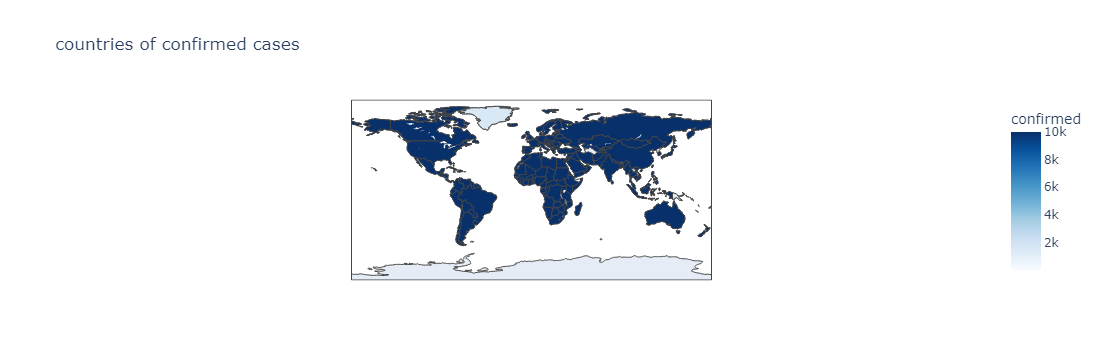

In [211]:
# Accessing geographical data of confirmed cases for every countries
figure= px.choropleth(world, locations='country', locationmode='country names', hover_name='country',
                     color='confirmed', range_color=[1,10000], color_continuous_scale='blues',
                     title='countries of confirmed cases')
figure.show()

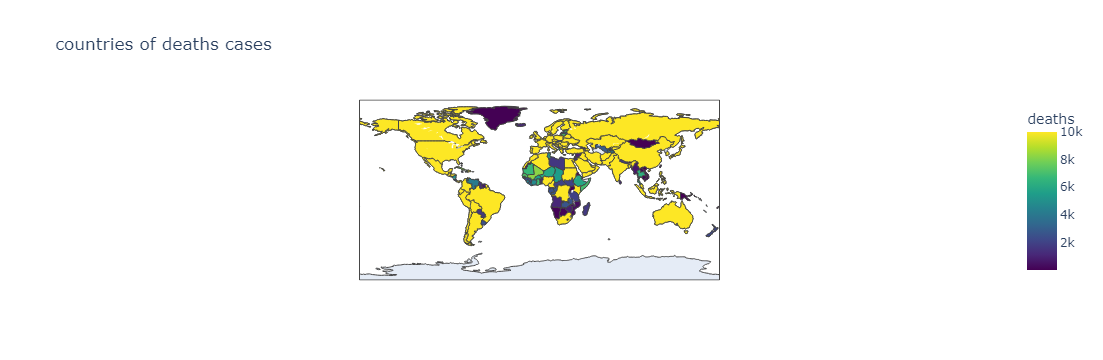

In [212]:
# Accessing geographical data of deaths cases for every countries
figure= px.choropleth(world, locations='country', locationmode='country names', hover_name='country',
                     color='deaths', range_color=[1,10000], color_continuous_scale='viridis',
                     title='countries of deaths cases')
figure.show()

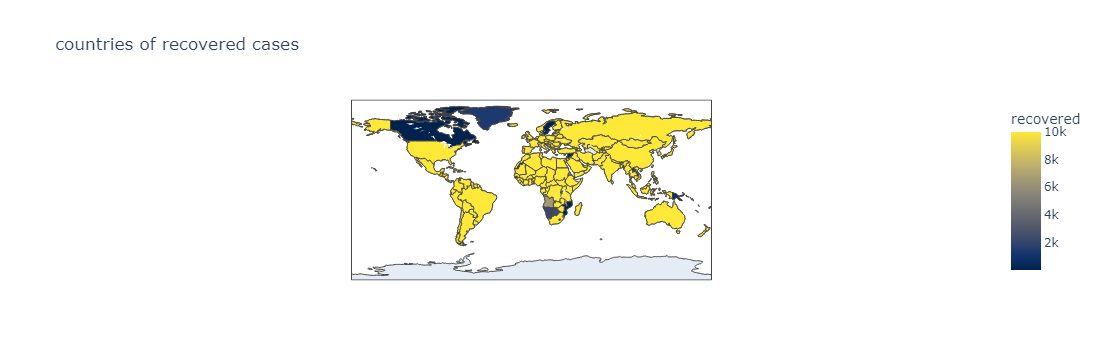

In [213]:
# Accessing geographical data of recovererd cases for every countries
figure= px.choropleth(world, locations='country', locationmode='country names', hover_name='country',
                     color='recovered', range_color=[1,10000], color_continuous_scale='cividis',
                     title='countries of recovered cases')
figure.show()

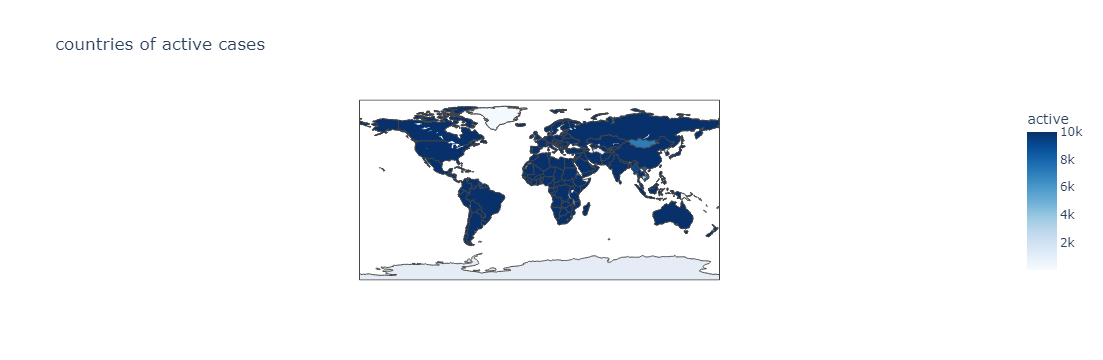

In [214]:
# Accessing geographical data of active cases for every countries
figure= px.choropleth(world, locations='country', locationmode='country names', hover_name='country',
                     color='active', range_color=[1,10000], color_continuous_scale='blues',
                     title='countries of active cases')
figure.show()

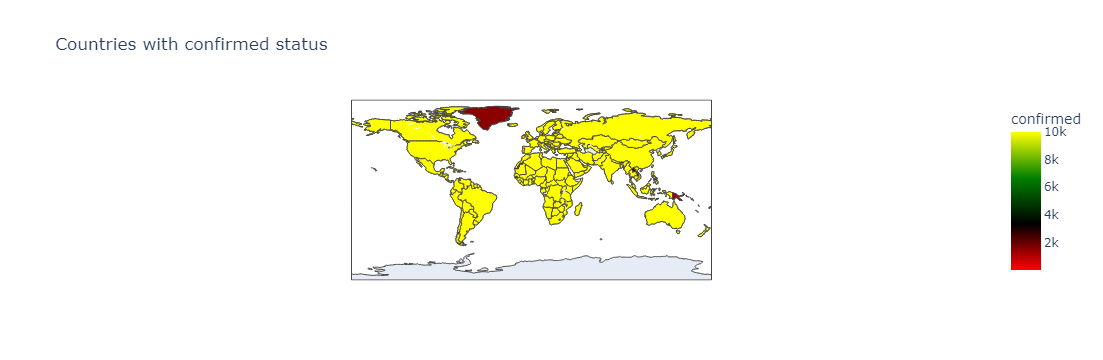

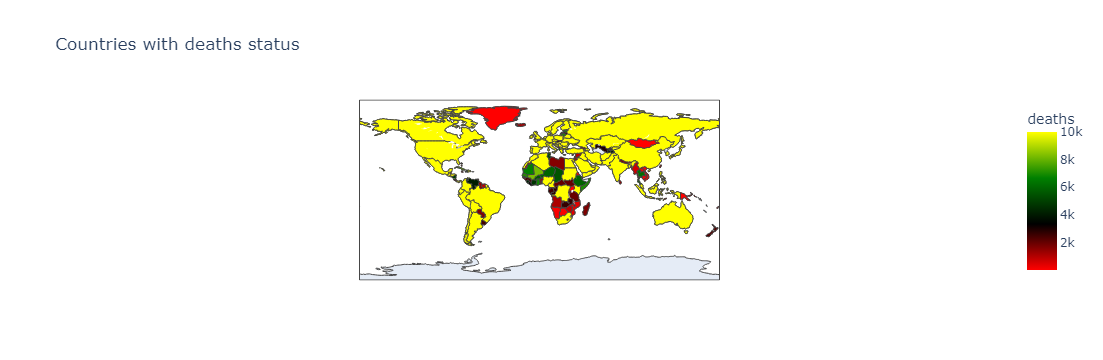

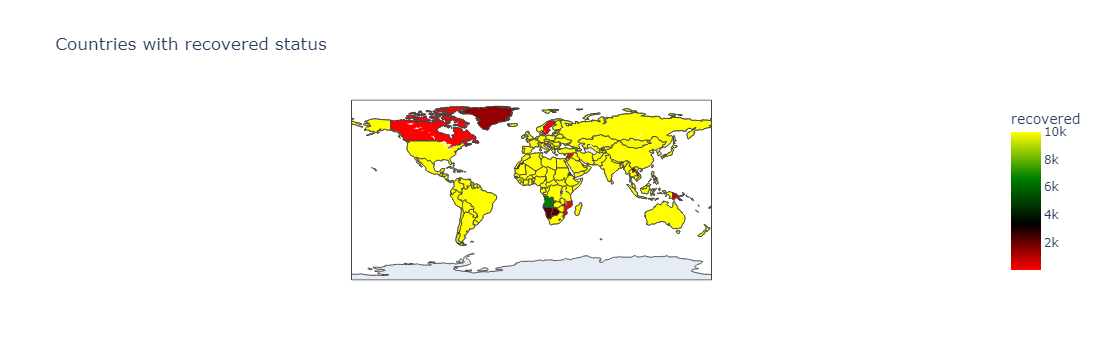

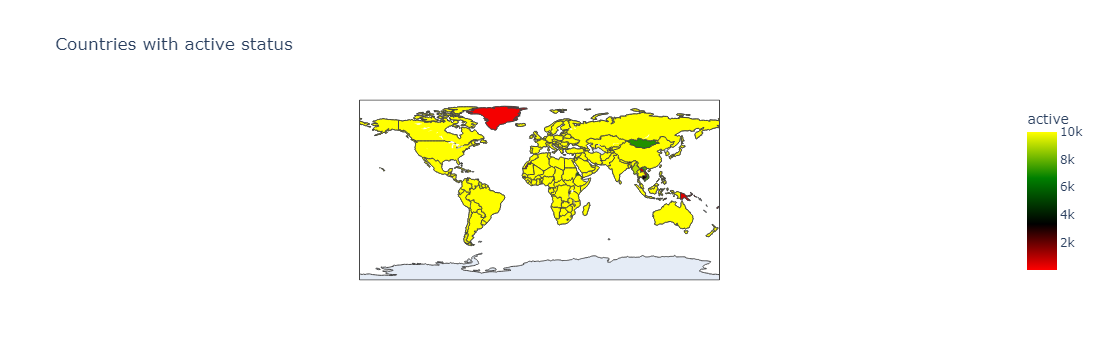

In [215]:
# Accessing geographical data of all the cases for every countries

countries= ['confirmed', 'deaths', 'recovered', 'active']

for cases in countries:
    figure = px.choropleth(world,
                           locations='country',
                           locationmode='country names',
                           hover_name='country',
                           color=cases,
                           range_color=[1,10000],
                           color_continuous_scale=['red', 'black', 'green', 'yellow'],
                           title= f'Countries with {cases} status')
    figure.show()


# Trend of the Covid cases in the world

### Trend of Confirmed Cases

In [218]:
# grouping the sum of confirmed cases all over the world based on date
confirmed_cases= covid_data.groupby(by='date').sum().reset_index()[['date', 'confirmed']]
confirmed_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


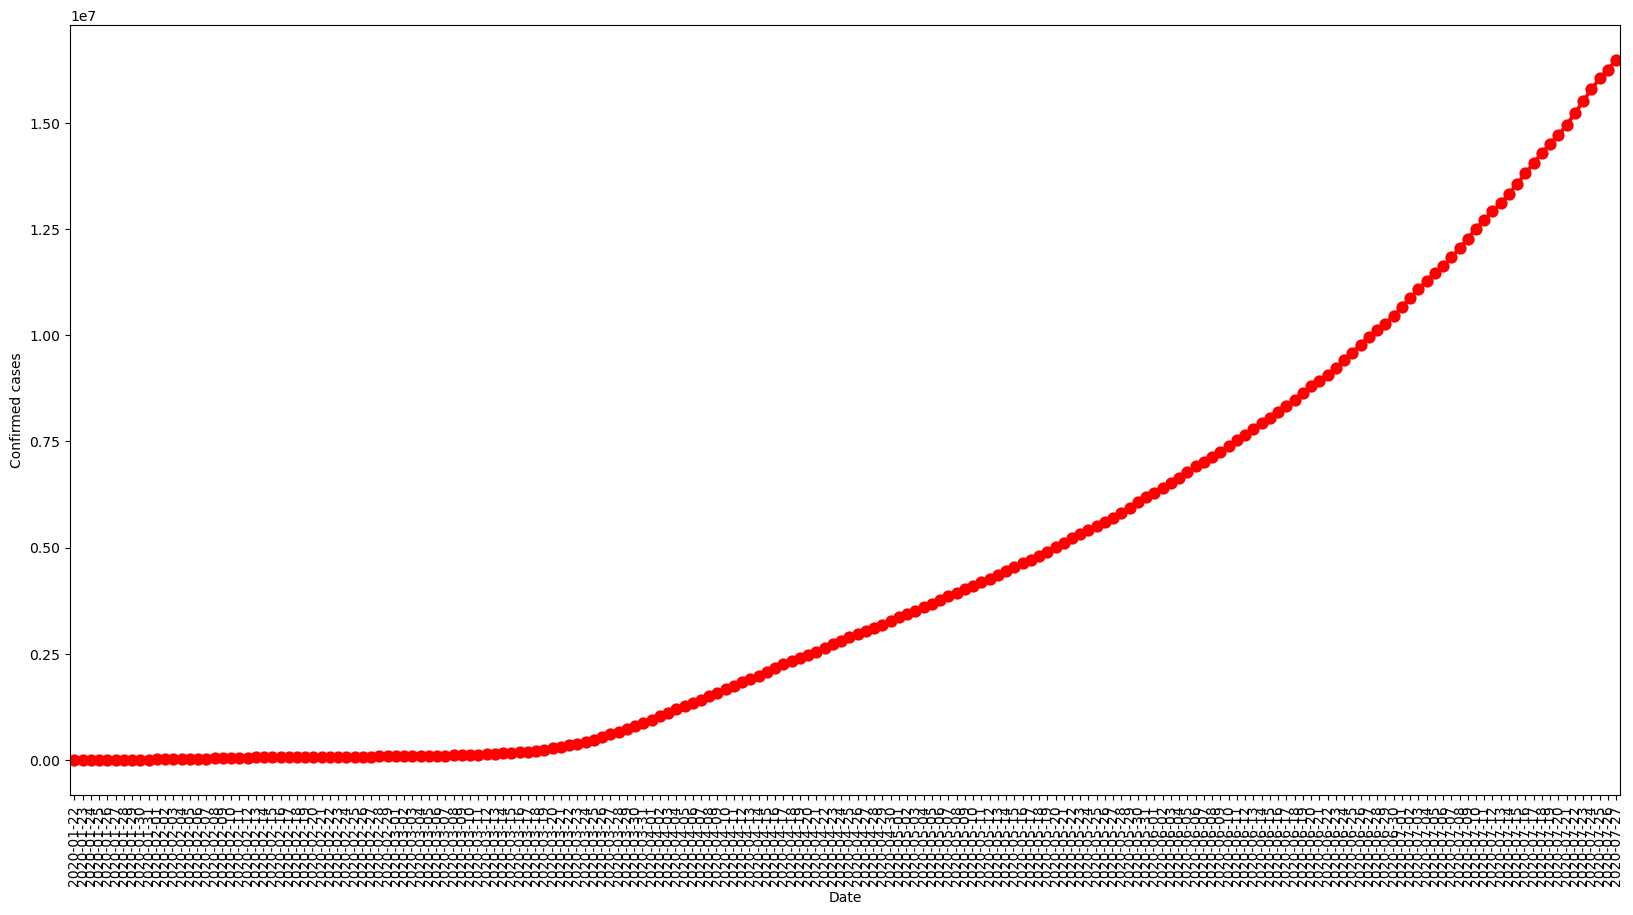

In [219]:
# Visualizing the trend of confirmed cases

plt.figure(figsize=(20,10))
sns.pointplot(x= confirmed_cases.date, y= confirmed_cases.confirmed, color='red')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.show()

### Trend of Deaths Cases

In [221]:
# grouping the sum of deaths cases all over the world based on date
deaths_cases= covid_data.groupby(by='date').sum().reset_index()[['date', 'deaths']]
deaths_cases

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


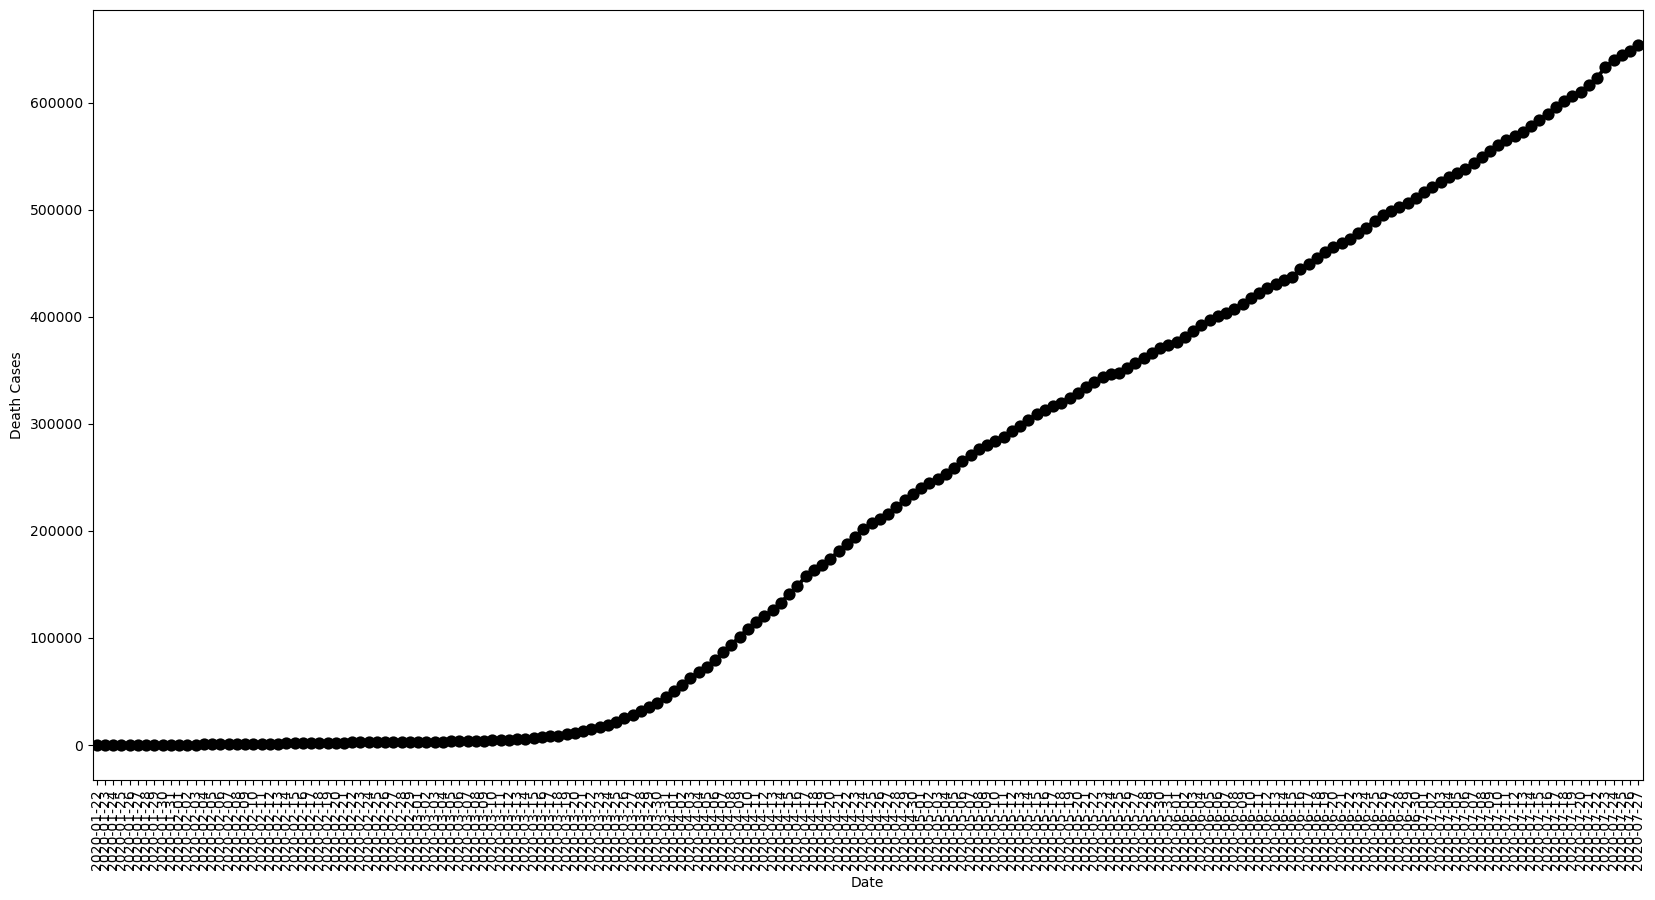

In [222]:
# Visualizing the trend of deaths cases

plt.figure(figsize=(20,10))
sns.pointplot(x= deaths_cases.date, y= deaths_cases.deaths, color='black')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Death Cases')
plt.show()

### Trend of Recovered Cases

In [224]:
# grouping the sum of recovered cases all over the world based on date
recovered_cases= covid_data.groupby(by='date').sum().reset_index()[['date', 'recovered']]
recovered_cases

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


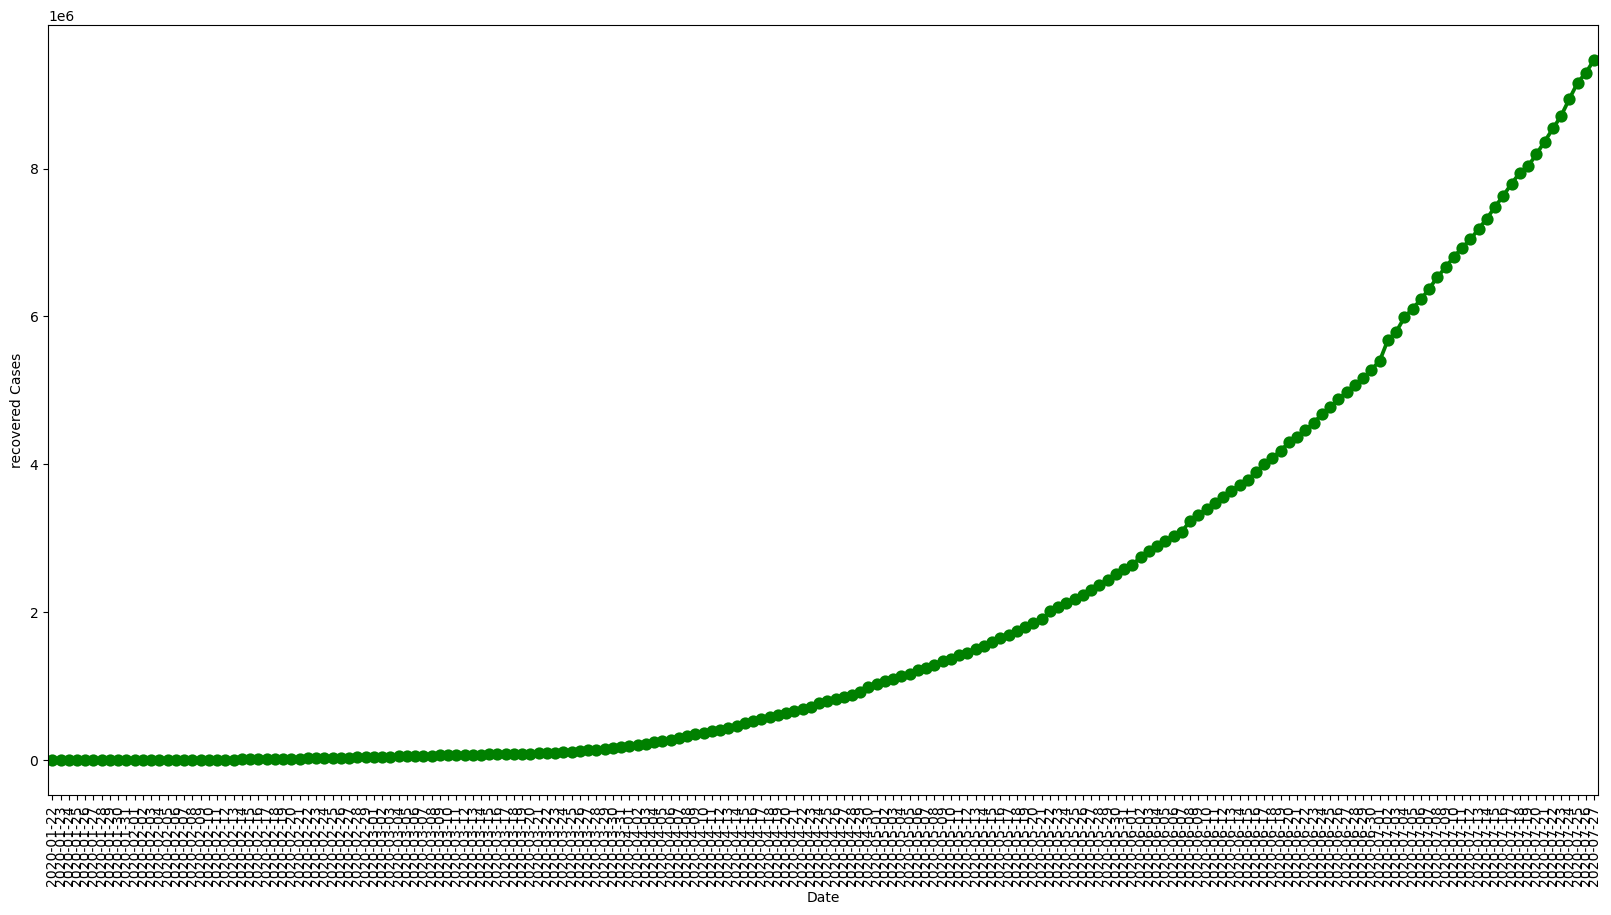

In [225]:
# Visualizing the trend of recovered cases

plt.figure(figsize=(20,10))
sns.pointplot(x= recovered_cases.date, y= recovered_cases.recovered, color='green')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('recovered Cases')
plt.show()

### Trend of Active Cases

In [227]:
# grouping the sum of active cases all over the world based on date
active_cases= covid_data.groupby(by='date').sum().reset_index()[['date', 'active']]
active_cases

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


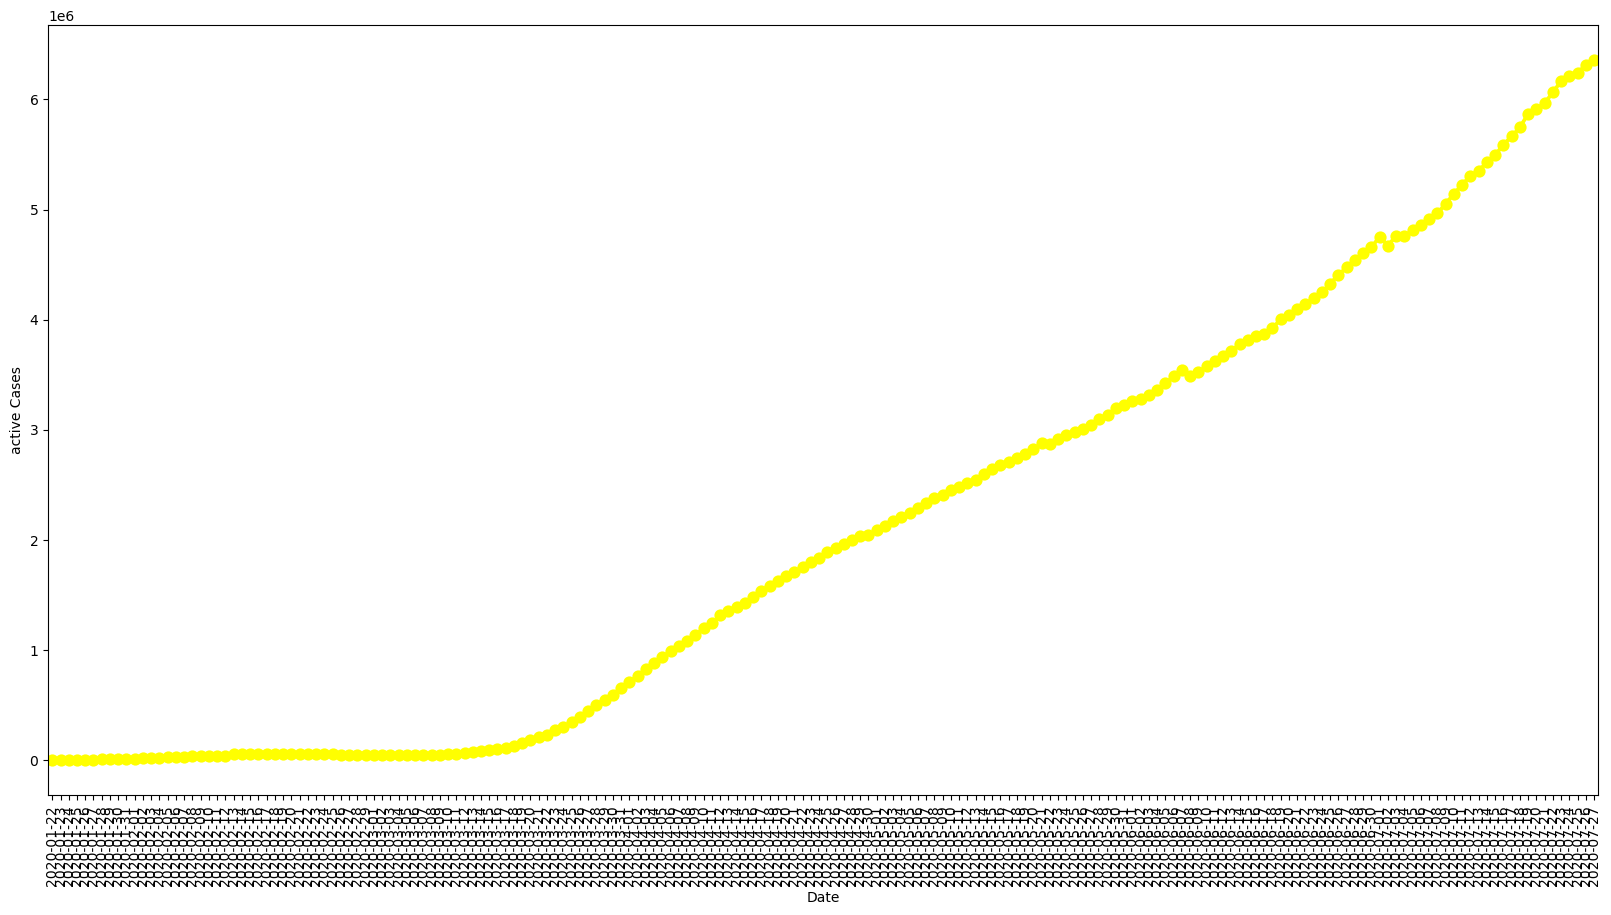

In [228]:
# Visualizing the trend of active cases

plt.figure(figsize=(20,10))
sns.pointplot(x= active_cases.date, y= active_cases.active, color='yellow')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('active Cases')
plt.show()

# Model building

**Prophet**

It is a forecasting tool developed by Facebook designed to handle time series data with daily observations that may contain seasonal effects.
It's particularly useful for data with strong seasonal patterns and missing values.

## Model building for Confirmed Cases

As we are doing the forecasting of number of cases world wide, thus we need to group the data by date column

In [233]:
confirmed_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


**Forecasting for the confirmed cases**

For building a forecasting model using prophet, there should be only 2 columns passed.

The column names should always be -> 'ds','y'

In [235]:
# Rename each confirmed case columns to ds and y according to the procedure
confirmed_cases.rename(columns= {'date': 'ds', 'confirmed': 'y'}, inplace=True)
confirmed_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [236]:
#training the model
model= Prophet(interval_width=0.95)
model.fit(confirmed_cases)

19:09:51 - cmdstanpy - INFO - Chain [1] start processing
19:09:51 - cmdstanpy - INFO - Chain [1] done processing


**Forecasting data of confirmed cases for 7 days**

In [238]:
#forecasting the model
future= model.make_future_dataframe(periods=7)

In [239]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


**Predicting forecasted data**

In [241]:
# predicting the model
forecast= model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9356.185581,-180770.242562,135100.271323,-9356.185581,-9356.185581,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-20342.396024
1,2020-01-23,-6667.733757,-162299.156456,157757.201174,-6667.733757,-6667.733757,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7746.625412
2,2020-01-24,-3979.281934,-148865.221545,162693.804665,-3979.281934,-3979.281934,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6123.967440
3,2020-01-25,-1290.830110,-143444.125639,163686.363558,-1290.830110,-1290.830110,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,12379.384088
4,2020-01-26,1397.621714,-156605.786046,175002.465438,1397.621714,1397.621714,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8615.766111


**ds**: Helps you understand which date each forecasted value corresponds to.

**yhat**: Provides the main forecasted value that you would likely use for making decisions.

**yhat_lower** and **yhat_upper**: These gives you a sense of the range within which the actual value is expected to fall, providing an uncertainity in the prediction.

In [243]:
# Accessing the important features from the forecasted data
forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
190,2020-07-30,1.659417e+07,1.674820e+07,1.691295e+07
191,2020-07-31,1.679537e+07,1.696362e+07,1.712476e+07
192,2020-08-01,1.699742e+07,1.717143e+07,1.732825e+07
193,2020-08-02,1.720075e+07,1.736922e+07,1.753763e+07
194,2020-08-03,1.736910e+07,1.756410e+07,1.774371e+07


**Visualizing the forecasted data**

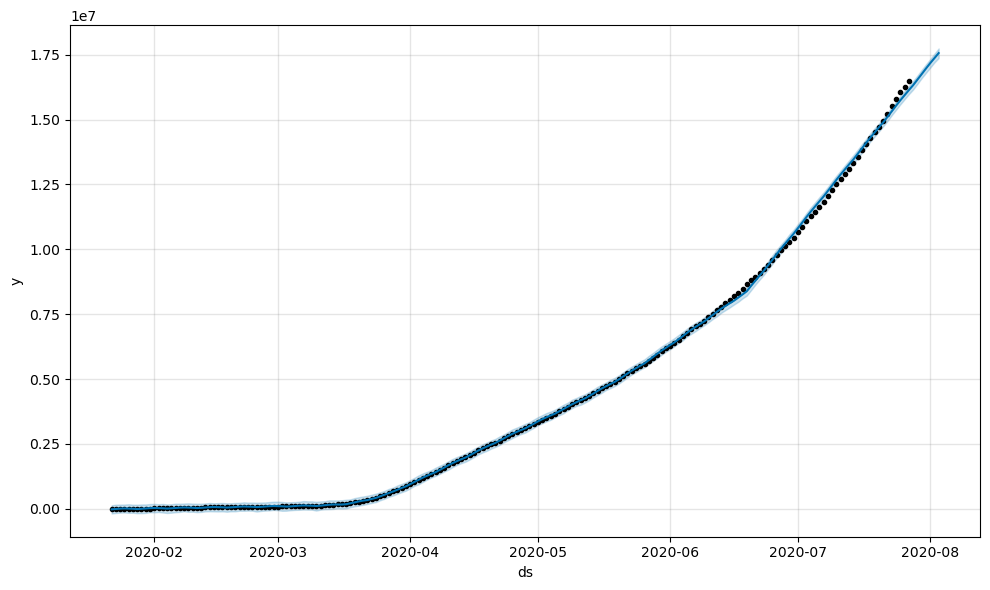

In [245]:
# Visualizing the forecasted data

confirmed_forecasting_plot= model.plot(forecast)
confirmed_forecasting_plot.show()

## Model building for Deaths Cases

As we are doing the forecasting of number of cases world wide, thus we need to group the data by date column

In [248]:
deaths_cases

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


**Forecasting for the deaths cases**

For building a forecasting model using prophet, there should be only 2 columns passed.

The column names should always be -> 'ds','y'

In [250]:
# Rename each deaths case columns to ds and y according to the procedue
deaths_cases.rename(columns= {'date': 'ds', 'deaths': 'y'}, inplace=True)
deaths_cases

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [251]:
#training the model
model1= Prophet(interval_width=0.95)
model1.fit(deaths_cases)

19:09:52 - cmdstanpy - INFO - Chain [1] start processing
19:09:53 - cmdstanpy - INFO - Chain [1] done processing


**Forecasting data of deaths cases for 7 days**

In [253]:
#forecasting the model
future1= model1.make_future_dataframe(periods=7)

In [254]:
future1

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


**Predicting forecasted data**

In [256]:
# predicting the model
forecast1= model1.predict(future1)
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-521.770954,-3860.897970,2276.045057,-521.770954,-521.770954,-191.374799,-191.374799,-191.374799,-191.374799,-191.374799,-191.374799,0.0,0.0,0.0,-713.145753
1,2020-01-23,-432.731822,-3041.389429,2864.650735,-432.731822,-432.731822,388.586941,388.586941,388.586941,388.586941,388.586941,388.586941,0.0,0.0,0.0,-44.144881
2,2020-01-24,-343.692690,-2564.377016,3478.521595,-343.692690,-343.692690,874.801623,874.801623,874.801623,874.801623,874.801623,874.801623,0.0,0.0,0.0,531.108934
3,2020-01-25,-254.653558,-2531.975065,3357.941512,-254.653558,-254.653558,727.298797,727.298797,727.298797,727.298797,727.298797,727.298797,0.0,0.0,0.0,472.645240
4,2020-01-26,-165.614426,-3087.714841,2798.175328,-165.614426,-165.614426,-165.701725,-165.701725,-165.701725,-165.701725,-165.701725,-165.701725,0.0,0.0,0.0,-331.316151


**ds**: Helps you understand which date each forecasted value corresponds to.

**yhat**: Provides the main forecasted value that you would likely use for making decisions.

**yhat_lower** and **yhat_upper**: These gives you a sense of the range within which the actual value is expected to fall, providing an uncertainity in the prediction.

In [258]:
# Accessing the important features from the forecasted data
forecast1[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
190,2020-07-30,660205.505673,663521.743356,666974.638582
191,2020-07-31,665543.012781,669038.962960,672506.790005
192,2020-08-01,669418.122548,673922.465056,677905.634827
193,2020-08-02,672834.476327,678060.469456,682875.208738
194,2020-08-03,675899.694229,682351.854619,687793.920249


**Visualizing the forecasted data**

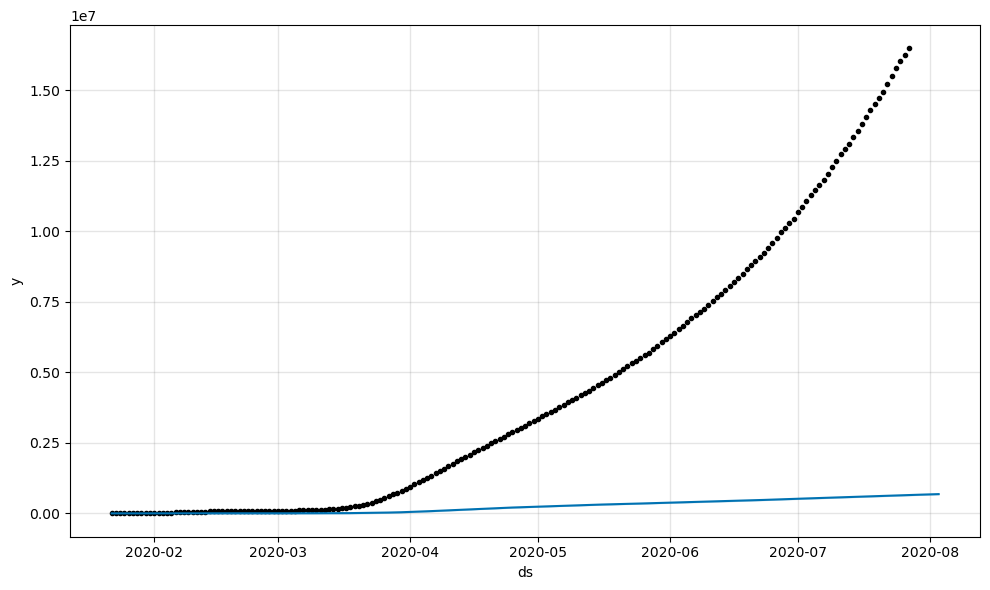

In [260]:
# Visualizing the forecasted data

deaths_forecasting_plot= model.plot(forecast1)
deaths_forecasting_plot.show()

## Model building for Recovered Cases

As we are doing the forecasting of number of cases world wide, thus we need to group the data by date column

In [263]:
recovered_cases

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


**Forecasting for the recovered cases**

For building a forecasting model using prophet, there should be only 2 columns passed.

The column names should always be -> 'ds','y'

In [265]:
# Rename each recovered case columns to ds and y according to the procedue
recovered_cases.rename(columns= {'date': 'ds', 'recovered': 'y'}, inplace=True)
recovered_cases

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [266]:
#training the model
model2= Prophet(interval_width=0.95)
model2.fit(recovered_cases)

19:09:54 - cmdstanpy - INFO - Chain [1] start processing
19:09:55 - cmdstanpy - INFO - Chain [1] done processing


**Forecasting data of recovered cases for 7 days**

In [268]:
#forecasting the model
future2= model2.make_future_dataframe(periods=7)

In [269]:
future2

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


**Predicting forecasted data**

In [271]:
# predicting the model
forecast2= model2.predict(future2)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-12057.419433,-132984.676281,102662.692800,-12057.419433,-12057.419433,-4840.302869,-4840.302869,-4840.302869,-4840.302869,-4840.302869,-4840.302869,0.0,0.0,0.0,-16897.722302
1,2020-01-23,-10986.082605,-124732.664810,120773.900640,-10986.082605,-10986.082605,1268.505419,1268.505419,1268.505419,1268.505419,1268.505419,1268.505419,0.0,0.0,0.0,-9717.577186
2,2020-01-24,-9914.745776,-124895.705406,108461.031704,-9914.745776,-9914.745776,6127.046185,6127.046185,6127.046185,6127.046185,6127.046185,6127.046185,0.0,0.0,0.0,-3787.699591
3,2020-01-25,-8843.408948,-122847.436733,115415.316430,-8843.408948,-8843.408948,9721.186032,9721.186032,9721.186032,9721.186032,9721.186032,9721.186032,0.0,0.0,0.0,877.777084
4,2020-01-26,-7772.072120,-124775.144139,109555.284603,-7772.072120,-7772.072120,-915.440191,-915.440191,-915.440191,-915.440191,-915.440191,-915.440191,0.0,0.0,0.0,-8687.512311


**ds**: Helps you understand which date each forecasted value corresponds to.

**yhat**: Provides the main forecasted value that you would likely use for making decisions.

**yhat_lower** and **yhat_upper**: These gives you a sense of the range within which the actual value is expected to fall, providing an uncertainity in the prediction.

In [273]:
# Accessing the important features from the forecasted data
forecast2[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
190,2020-07-30,9.467950e+06,9.598531e+06,9.715955e+06
191,2020-07-31,9.621633e+06,9.740095e+06,9.864719e+06
192,2020-08-01,9.753466e+06,9.880394e+06,1.000174e+07
193,2020-08-02,9.876985e+06,1.000646e+07,1.014143e+07
194,2020-08-03,1.001258e+07,1.014305e+07,1.027339e+07


**Visualizing the forecasted data**

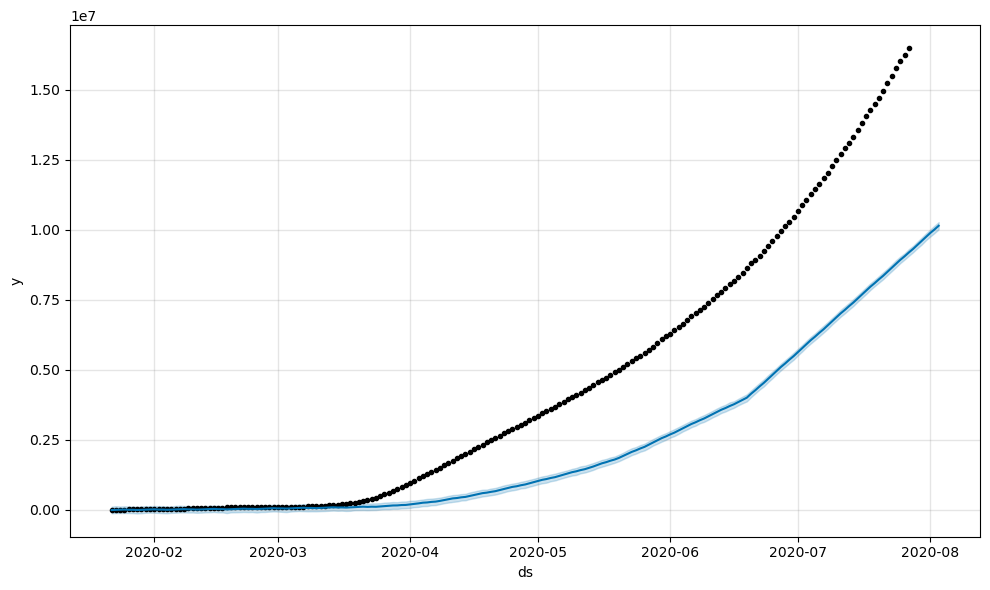

In [275]:
# Visualizing the forecasted data

recovered_forecasting_plot= model.plot(forecast2)
recovered_forecasting_plot.show()

## Model building for Active Cases

As we are doing the forecasting of number of cases world wide, thus we need to group the data by date column

In [278]:
active_cases

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


**Forecasting for the active cases**

For building a forecasting model using prophet, there should be only 2 columns passed.

The column names should always be -> 'ds','y'

In [280]:
# Rename each active case columns to ds and y according to the procedue
active_cases.rename(columns= {'date': 'ds', 'active': 'y'}, inplace=True)
active_cases

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [281]:
#training the model
model3= Prophet(interval_width=0.95)
model3.fit(active_cases)

19:09:56 - cmdstanpy - INFO - Chain [1] start processing
19:09:56 - cmdstanpy - INFO - Chain [1] done processing


**Forecasting data of recovered cases for 7 days**

In [283]:
#forecasting the model
future3= model3.make_future_dataframe(periods=7)

In [284]:
future3

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


**Predicting forecasted data**

In [286]:
# predicting the model
forecast3= model3.predict(future3)
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,393.864283,-77457.683927,70911.438786,393.864283,393.864283,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,-5768.245001,0.0,0.0,0.0,-5374.380717
1,2020-01-23,2179.132524,-69220.206160,70720.790822,2179.132524,2179.132524,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,-2565.777101,0.0,0.0,0.0,-386.644577
2,2020-01-24,3964.400764,-59520.215262,75840.187541,3964.400764,3964.400764,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,3219.382782,0.0,0.0,0.0,7183.783546
3,2020-01-25,5749.669005,-60368.265624,80100.262608,5749.669005,5749.669005,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,3129.564761,0.0,0.0,0.0,8879.233766
4,2020-01-26,7534.937245,-51239.085916,84970.323428,7534.937245,7534.937245,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,8182.557400,0.0,0.0,0.0,15717.494645


**ds**: Helps you understand which date each forecasted value corresponds to.

**yhat**: Provides the main forecasted value that you would likely use for making decisions.

**yhat_lower** and **yhat_upper**: These gives you a sense of the range within which the actual value is expected to fall, providing an uncertainity in the prediction.

In [288]:
# Accessing the important features from the forecasted data
forecast3[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail()

,ds,yhat_lower,yhat,yhat_upper
190,2020-07-30,6.414261e+06,6.481007e+06,6.547803e+06
191,2020-07-31,6.477537e+06,6.549045e+06,6.617209e+06
192,2020-08-01,6.532555e+06,6.611208e+06,6.685291e+06
193,2020-08-02,6.592856e+06,6.678514e+06,6.752216e+06
194,2020-08-03,6.644342e+06,6.732249e+06,6.807641e+06


**Visualizing the forecasted data**

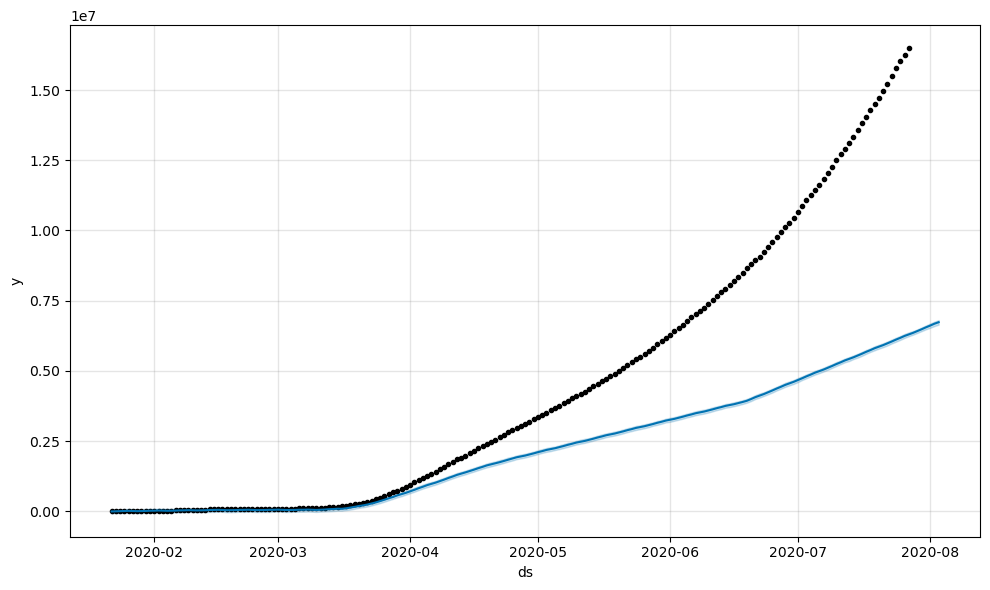

In [290]:
# Visualizing the forecasted data

active_forecasting_plot= model.plot(forecast3)
active_forecasting_plot.show()